# Walmart Sales Project

***Import Important Libraries***

In [276]:
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

***Import the dataset***


In [277]:
# Import dataset
print("Loading dataset...")

path_to_file="/Users/saas1/OneDrive/Escritorio/introduction_to_ python_for_data_science/Projects/Project_4/Walmart_Sales"
df = pd.read_csv(path_to_file+"/Walmart_Store_sales.csv")
print("...Done.")
df.head()

Loading dataset...
...Done.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


***Looking the df info,shape,describe***

In [278]:
df.shape

(150, 8)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [280]:
df.isnull().sum().sort_values(ascending=False)

Date            18
Temperature     18
Unemployment    15
Weekly_Sales    14
Fuel_Price      14
Holiday_Flag    12
CPI             12
Store            0
dtype: int64

In [281]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


***Create a df excluding Y missing values***

In [282]:
mask=df["Weekly_Sales"].notnull()

final_df=df[mask]

In [283]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  125 non-null    float64
 4   Temperature   121 non-null    float64
 5   Fuel_Price    124 non-null    float64
 6   CPI           125 non-null    float64
 7   Unemployment  122 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [284]:
final_df.isnull().sum().sort_values(ascending=False)

Date            18
Temperature     15
Unemployment    14
Fuel_Price      12
Holiday_Flag    11
CPI             11
Store            0
Weekly_Sales     0
dtype: int64

***Checking if there are some categorical variables***

In [285]:
final_df.nunique().sort_values(ascending=False)

#Store and Holiday_Flag seems to be categorical

Weekly_Sales    136
CPI             123
Temperature     119
Fuel_Price      113
Unemployment    100
Date             79
Store            20
Holiday_Flag      2
dtype: int64

In [286]:
final_df.groupby("Holiday_Flag")['Holiday_Flag'].count() # Two categories

Holiday_Flag
0.0    116
1.0      9
Name: Holiday_Flag, dtype: int64

In [287]:
final_df.groupby('Store')['Store'].count().sort_values(ascending=False) # Muticategories

Store
3.0     12
18.0    10
1.0      9
14.0     9
13.0     9
5.0      8
7.0      8
19.0     8
2.0      8
17.0     7
4.0      6
6.0      6
8.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

### Some Visualizations

In [288]:
#Pandas profiling easy way to obtain all the visualization in one report
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

***Target Variable Distribution***

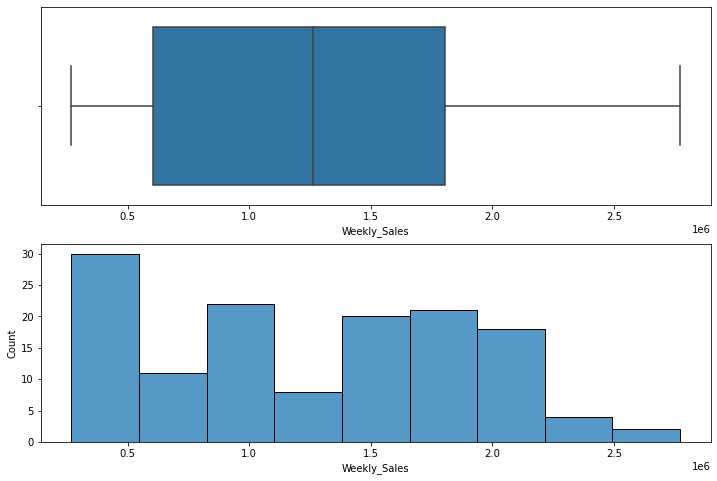

In [289]:
fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.boxplot(x=final_df["Weekly_Sales"],ax=ax[0])
sns.histplot(x=final_df["Weekly_Sales"],ax=ax[1])
plt.show()

***Explanatory variables distributions/boxplot***

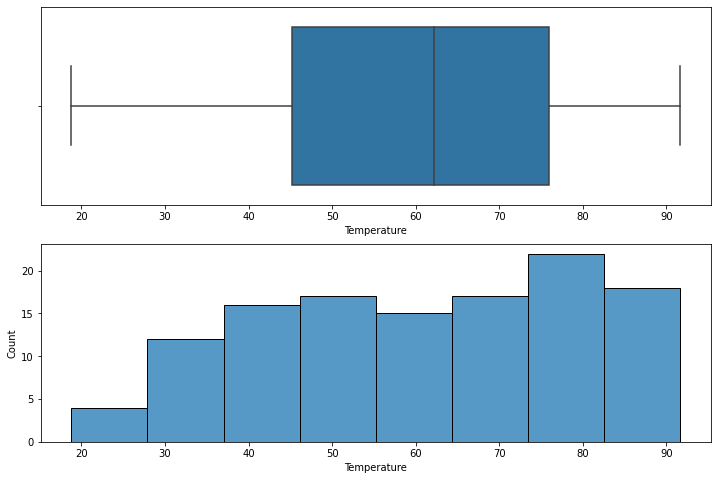

In [290]:
fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.boxplot(x=final_df["Temperature"],ax=ax[0])
sns.histplot(x=final_df["Temperature"],ax=ax[1])
plt.show()


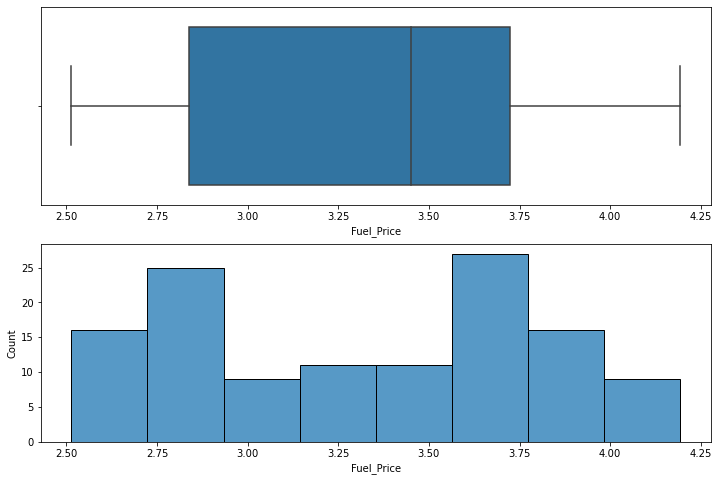

In [291]:
fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.boxplot(x=final_df["Fuel_Price"],ax=ax[0])
sns.histplot(x=final_df["Fuel_Price"],ax=ax[1])
plt.show()


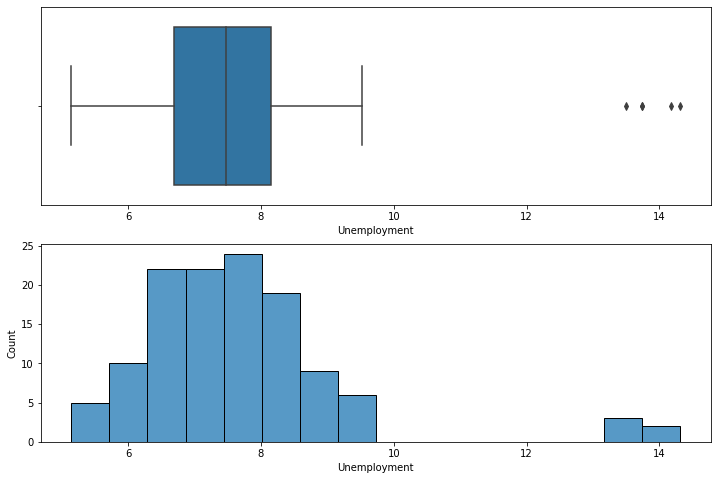

In [292]:
# Some outliers 
fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.boxplot(x=final_df["Unemployment"],ax=ax[0])
sns.histplot(x=final_df["Unemployment"],ax=ax[1])
plt.show()


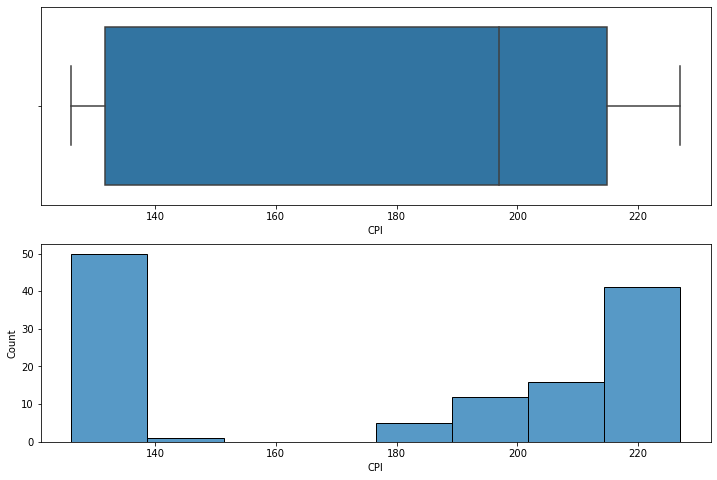

In [293]:
# Some outliers 

fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.boxplot(x=final_df["CPI"],ax=ax[0])
sns.histplot(x=final_df["CPI"],ax=ax[1])
plt.show()

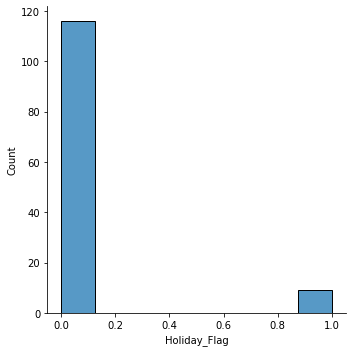

In [294]:
sns.displot(x=final_df["Holiday_Flag"]) #This is a categorical variable (binary)

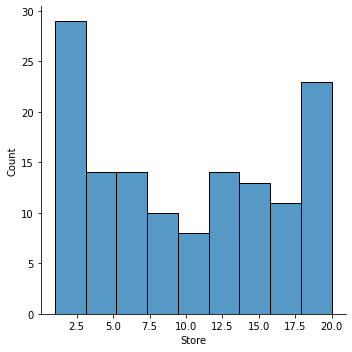

In [295]:
sns.displot(x=final_df["Store"]) #This is a categorical variable (multiples categories)

***Target Variable vs Explanatory Variables***

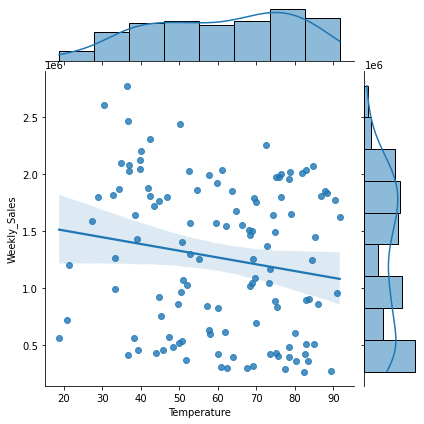

In [296]:
sns.jointplot(data=final_df, y="Weekly_Sales", x="Temperature",kind="reg")

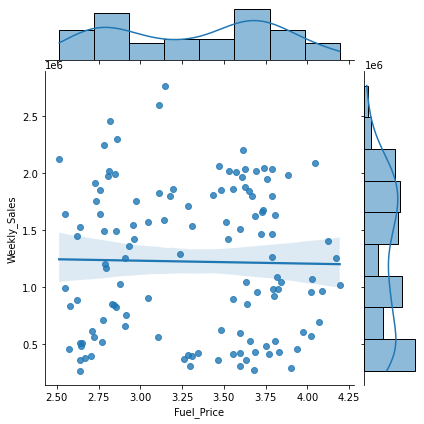

In [297]:
sns.jointplot(data=final_df, y="Weekly_Sales", x="Fuel_Price",kind="reg")

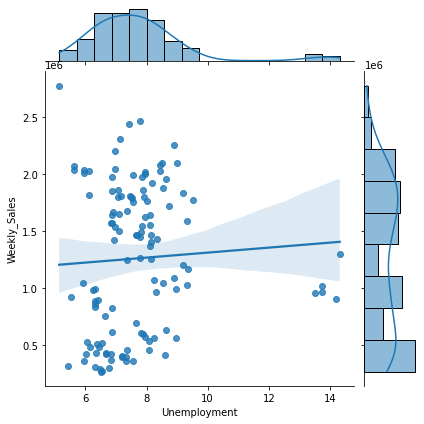

In [298]:
sns.jointplot(data=final_df, y="Weekly_Sales", x="Unemployment",kind="reg")

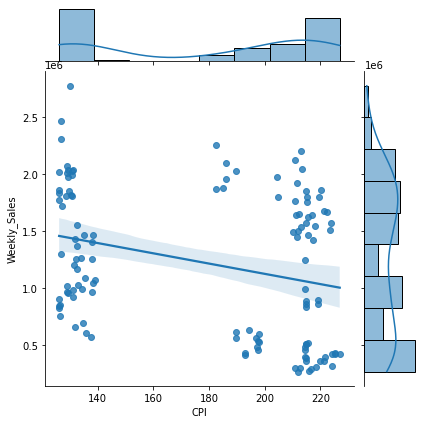

In [299]:
sns.jointplot(data=final_df, y="Weekly_Sales", x="CPI",kind="reg")

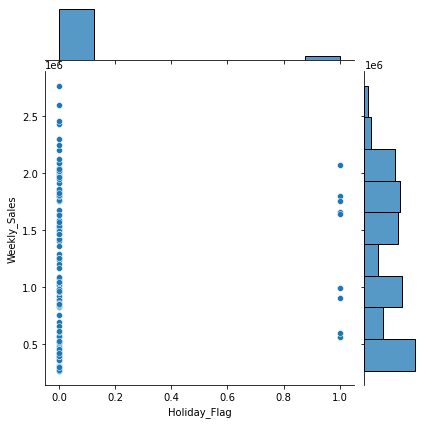

In [300]:
sns.jointplot(data=final_df, y="Weekly_Sales", x="Holiday_Flag")


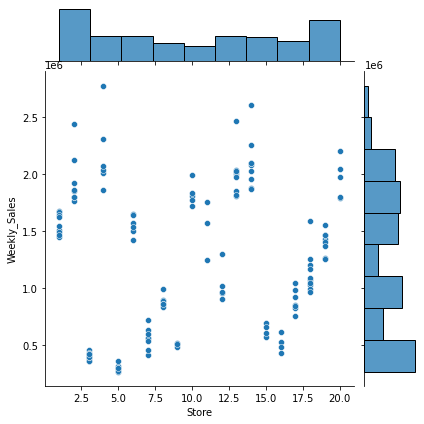

In [301]:
sns.jointplot(data=final_df, y="Weekly_Sales", x="Store")

***Correlation Matrix***

<AxesSubplot:>

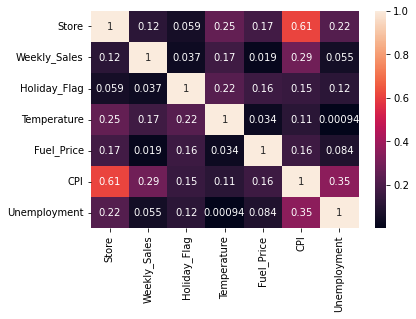

In [302]:
corre=abs(final_df.corr())
sns.heatmap(corre, annot=True)

### Treating the outliers ###

In [303]:
final_df=final_df.drop(columns="Date",axis=1)
final_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [304]:
clean_df=final_df

num_columns= ["Temperature","Fuel_Price","CPI","Unemployment"]
for i in num_columns:
    col_std=(final_df[i].std())*3
    col_mean=final_df[i].mean()
    
    upper_level=col_mean+col_std
    lower_level=col_mean-col_std

    mask=(final_df[i]>= lower_level) & (final_df[i]<=upper_level)

    clean_df=clean_df[mask]


    print(i,"--Lower_level--",lower_level,"--Mean/Average--",col_mean,"--Upper_level--",upper_level)

Temperature --Lower_level-- 5.310671332416675 --Mean/Average-- 60.853966942148745 --Upper_level-- 116.39726255188081
Fuel_Price --Lower_level-- 1.8783712293923445 --Mean/Average-- 3.3169919354838697 --Upper_level-- 4.755612641575395
CPI --Lower_level-- 57.36182994106022 --Mean/Average-- 178.09114404399995 --Upper_level-- 298.8204581469397
Unemployment --Lower_level-- 2.80729684215221 --Mean/Average-- 7.665581967213114 --Upper_level-- 12.523867092274017


C:\Users\saas1\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [305]:
clean_df.describe() 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,90.000000,9.000000e+01,80.000000,90.00000,90.000000,90.000000,90.000000
mean,9.900000,1.233865e+06,0.075000,61.06100,3.318444,179.524905,7.389733
std,6.204475,6.647250e+05,0.265053,17.74604,0.484399,39.554303,0.982729
min,1.000000,2.689290e+05,0.000000,18.79000,2.548000,126.128355,5.143000
25%,4.000000,5.617240e+05,0.000000,45.34250,2.814750,132.602339,6.642250
50%,9.000000,1.260826e+06,0.000000,61.45000,3.468000,197.166416,7.419000
75%,15.750000,1.807159e+06,0.000000,75.79250,3.737750,214.855374,8.099000
max,20.000000,2.771397e+06,1.000000,91.65000,4.170000,226.968844,9.342000


In [306]:
clean_df.isnull().sum().sort_values(ascending=False)

Holiday_Flag    10
Store            0
Weekly_Sales     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
dtype: int64

### Spliting the DF ###

In [307]:
Y=clean_df["Weekly_Sales"]
X=clean_df.drop(columns=["Weekly_Sales"],axis=1)

In [308]:
X.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.21, random_state=0,stratify=X[["Store"]])

In [310]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values

### Preprocessing Pipeline ###

In [311]:
#Columns Indexes

num_index=[2,3,4,5]
cat_index_1=[0]
cat_index_2=[1]

In [312]:
categorical_transformer_1 = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [313]:
categorical_transformer_2 = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
     ])

In [314]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [315]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_index),
        ('cat-1', categorical_transformer_1, cat_index_1),
        ('cat-2', categorical_transformer_2, cat_index_2)
    ])

In [316]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print()


Performing preprocessings on train set...
...Done.



In [317]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) 
print('...Done.')
print()

Performing preprocessings on test set...
...Done.



### Linear Regressor Baseline ### 

In [318]:
regressor_base=LinearRegression()

In [319]:
regressor_base.fit(X_train,Y_train)

LinearRegression()

***Performance Assessment in train dataset***

In [320]:
print("Score on training")
rb_train_predict= regressor_base.predict(X_train)
print("Linear Regression R_2 Score : ", r2_score(Y_train, rb_train_predict))
print("Linear Regression mean squared error : ", mean_squared_error(Y_train, rb_train_predict))
print("Linear Regression mean absolute error : ", mean_absolute_error(Y_train, rb_train_predict))

Score on training
Linear Regression R_2 Score :  0.9753302762731941
Linear Regression mean squared error :  10959506733.829863
Linear Regression mean absolute error :  77209.64478147204


***Performance Assessment in test dataset***

In [321]:
print("Score on test")
rb_test_predict= regressor_base.predict(X_test)
print("Linear Regression R_2 Score : ", r2_score(Y_test, rb_test_predict))
print("Linear Regression mean squared error : ", mean_squared_error(Y_test, rb_test_predict))
print("Linear Regression mean absolute error : ", mean_absolute_error(Y_test, rb_test_predict))

Score on test
Linear Regression R_2 Score :  0.9698414414513258
Linear Regression mean squared error :  12193824981.755808
Linear Regression mean absolute error :  82136.75975864501


***There is not overfitting***

In [322]:
regressor_base.coef_

array([  -19583.0955622 ,   -93205.36224986,   647359.26611895,
         -31447.10195771,   223582.82015906, -1305802.55575684,
        2055698.59446438, -1358709.47732283,   -13504.80552632,
        -693723.12727995,  -830107.39245577, -1228607.54637771,
        1671677.27347103,   -47656.85516153,  1848361.14974983,
         975203.10854392,   527836.37373108,  -718912.74553944,
         609032.62472445,   857186.91119304,  1158008.35511636,
         558114.05819877,     6175.92055547])

In [323]:
coeff=abs(regressor_base.coef_)
coeff= pd.DataFrame(coeff).sort_values(by=0,ascending=False)
coeff

,0
6,2.055699e+06
14,1.848361e+06
12,1.671677e+06
7,1.358709e+06
5,1.305803e+06
11,1.228608e+06
20,1.158008e+06
15,9.752031e+05
19,8.571869e+05
10,8.301074e+05


The less important features are X23,X9,X1,X4,X14,X2


***Analysing the Statistics P-Value and F-Score***

In [324]:
X_stats=X_train.toarray()
Y_stats=Y_train

X_stats = sm.add_constant(X_stats)
model_ = sm.OLS(Y_stats, X_stats)
results = model_.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     80.79
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.52e-30
Time:                        20:56:44   Log-Likelihood:                -921.41
No. Observations:                  71   AIC:                             1891.
Df Residuals:                      47   BIC:                             1945.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.004e+06   3.55e+05      2.825      0.0

In [325]:
results.pvalues>0.05

array([False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False,  True,  True,  True, False,  True])

The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant

X1,X3,X4,X9,X14,X18,X23 are not statistically significants

***Let's test the performance in cross validation***

In [326]:
scores=cross_val_score(regressor_base,X_train,Y_train,cv=3,scoring="r2")
print(scores)
print(scores.mean())


[0.92708575 0.63825796 0.56778573]
0.711043144637944


### Linear Regressor Ridge ### 

Linear Regressor Ridge without hyperparameter optimization alpha=1

In [327]:
ridge_model=Ridge()

ridge_model.fit(X_train,Y_train)



Ridge()

***Performance Assessment in train dataset***

In [328]:
print("Ridge_Score on training")
ridge_b_train_predict= ridge_model.predict(X_train)
print("Ridge Linear Regression R_2 Score : ", r2_score(Y_train, ridge_b_train_predict))
print("Ridge Linear Regression mean squared error : ", mean_squared_error(Y_train, ridge_b_train_predict))
print("Ridge Linear Regression mean absolute error : ", mean_absolute_error(Y_train, ridge_b_train_predict))

Ridge_Score on training
Ridge Linear Regression R_2 Score :  0.9155899493277454
Ridge Linear Regression mean squared error :  37499103313.43912
Ridge Linear Regression mean absolute error :  151854.5270339756


***Performance Assessment in test dataset***

In [329]:
print("Ridge_Score on test")
ridge_b_test_predict= ridge_model.predict(X_test)
print("Ridge Linear Regression R_2 Score : ", r2_score(Y_test, ridge_b_test_predict))
print("Ridge Linear Regression mean squared error : ", mean_squared_error(Y_test, ridge_b_test_predict))
print("Ridge Linear Regression mean absolute error : ", mean_absolute_error(Y_test, ridge_b_test_predict))

Ridge_Score on test
Ridge Linear Regression R_2 Score :  0.9111081157448705
Ridge Linear Regression mean squared error :  35941110287.354706
Ridge Linear Regression mean absolute error :  157662.96156880952


There is not overfitting, let's do a cross validation

In [330]:
scores=cross_val_score(ridge_model,X_train,Y_train,cv=3,scoring="r2")
print(scores)
print(scores.mean())


[0.75778852 0.7248498  0.80365393]
0.7620974158509703


***Let's try to find the best alpha and let's perform a cross validation with 3 folds***

In [331]:
candidate_alpha=[]

for i in range(0,11,1):
    c=i/10
    candidate_alpha.append(c)

print(candidate_alpha)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [332]:
params={'alpha':candidate_alpha}

In [333]:
gridsearch = GridSearchCV(ridge_model, param_grid = params, cv = 3,verbose=1) 
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)
print("Best estimator : ", gridsearch.best_estimator_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
...Done.
Best hyperparameters :  {'alpha': 0.2}
Best R2 score :  0.8427559854423592
Best estimator :  Ridge(alpha=0.2)


In [334]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00266433, 0.00532985, 0.00532897, 0.00532969, 0.00532993,
        0.00266616, 0.00531983, 0.00532866, 0.00799449, 0.00533017,
        0.00266417]),
 'std_fit_time': array([3.76792826e-03, 3.76879618e-03, 3.76815305e-03, 3.76865895e-03,
        3.76882743e-03, 3.77051326e-03, 3.76171924e-03, 3.76803990e-03,
        5.15900687e-06, 3.76899613e-03, 3.76770347e-03]),
 'mean_score_time': array([0.00533001, 0.        , 0.        , 0.        , 0.        ,
        0.00266488, 0.        , 0.        , 0.        , 0.        ,
        0.0026776 ]),
 'std_score_time': array([0.00376888, 0.        , 0.        , 0.        , 0.        ,
        0.00376871, 0.        , 0.        , 0.        , 0.        ,
        0.0037867 ]),
 'param_alpha': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=ob

***Check the performance of the best estimator in test and train dataframe***

In [335]:
print("Ridge Best Estimator Score on training")
ridge_b_train_predict= gridsearch.best_estimator_.predict(X_train)
print("Ridge Best Estimator Linear Regression R_2 Score : ", r2_score(Y_train, ridge_b_train_predict))
print("Ridge Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_train, ridge_b_train_predict))
print("Ridge Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_train, ridge_b_train_predict))

Ridge Best Estimator Score on training
Ridge Best Estimator Linear Regression R_2 Score :  0.9662829233851018
Ridge Best Estimator Linear Regression mean squared error :  14978786641.396996
Ridge Best Estimator Linear Regression mean absolute error :  89016.52285102117


In [336]:
print("Ridge Best Estimator Score on test")
ridge_b_test_predict= gridsearch.best_estimator_.predict(X_test)
print("Ridge Best Estimator Linear Regression R_2 Score : ", r2_score(Y_test, ridge_b_test_predict))
print("Ridge Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_test, ridge_b_test_predict))
print("Ridge Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_test, ridge_b_test_predict))

Ridge Best Estimator Score on test
Ridge Best Estimator Linear Regression R_2 Score :  0.9617792918800572
Ridge Best Estimator Linear Regression mean squared error :  15453544463.710587
Ridge Best Estimator Linear Regression mean absolute error :  86508.3625591577


### Linear Regressor Lasso ### 

Linear Regressor Lasso without hyperparameter optimization max_iter=100000

In [349]:
lasso_model=Lasso(max_iter=10000000)

lasso_model.fit(X_train,Y_train)


Lasso(max_iter=10000000)

In [350]:
scores=cross_val_score(lasso_model,X_train,Y_train,cv=3,scoring="r2")
print(scores)
print(scores.mean())

[0.92712777 0.63816597 0.56814486]
0.7111462016408759


***Performance Assessment in train dataset***

In [351]:
print("Lasso_Score on training")
lasso_b_train_predict= lasso_model.predict(X_train)
print("Lasso Linear Regression R_2 Score : ", r2_score(Y_train, lasso_b_train_predict))
print("Lasso Linear Regression mean squared error : ", mean_squared_error(Y_train, lasso_b_train_predict))
print("Lasso Linear Regression mean absolute error : ", mean_absolute_error(Y_train, lasso_b_train_predict))

Lasso_Score on training
Lasso Linear Regression R_2 Score :  0.9753299350148571
Lasso Linear Regression mean squared error :  10959658337.596645
Lasso Linear Regression mean absolute error :  77178.016526235


***Performance Assessment in test dataset***

In [352]:
print("Lasso_Score on test")
lasso_b_test_predict= lasso_model.predict(X_test)
print("Lasso Linear Regression R_2 Score : ", r2_score(Y_test, lasso_b_test_predict))
print("Lasso Linear Regression mean squared error : ", mean_squared_error(Y_test, lasso_b_test_predict))
print("Lasso Linear Regression mean absolute error : ", mean_absolute_error(Y_test, lasso_b_test_predict))

Lasso_Score on test
Lasso Linear Regression R_2 Score :  0.9698247612156091
Lasso Linear Regression mean squared error :  12200569199.144577
Lasso Linear Regression mean absolute error :  82066.57141796144


***Let's try to find the best alpha and let's perform a cross validation with 3 folds***

In [354]:
candidate_alpha=range(0,10000,10)

In [355]:
params={'alpha':candidate_alpha}

gridsearch = GridSearchCV(lasso_model, param_grid = params, cv = 3,verbose=1) 
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)
print("Best estimator : ", gridsearch.best_estimator_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\saas1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\saas1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142025088596.63855, tolerance: 2068218200.8503428
  positive,
C:\Users\saas1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\saas1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203023878981.839

...Done.
Best hyperparameters :  {'alpha': 2010}
Best R2 score :  0.8120801031916803
Best estimator :  Lasso(alpha=2010, max_iter=10000000)


***Performance Assessment in train dataset***

In [357]:
print("Lasso Best Estimator Score on training")
lasso_b_train_predict= gridsearch.best_estimator_.predict(X_train)
print("Lasso Best Estimator Linear Regression R_2 Score : ", r2_score(Y_train, lasso_b_train_predict))
print("Lasso Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_train, lasso_b_train_predict))
print("Lasso Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_train, lasso_b_train_predict))

Lasso Best Estimator Score on training
Lasso Best Estimator Linear Regression R_2 Score :  0.9689740010027101
Lasso Best Estimator Linear Regression mean squared error :  13783277376.759735
Lasso Best Estimator Linear Regression mean absolute error :  85744.2595832318


***Performance Assessment in test dataset***

In [358]:
print("Lasso Best Estimator Score on test")
lasso_b_train_predict= gridsearch.best_estimator_.predict(X_test)
print("Lasso Best Estimator Linear Regression R_2 Score : ", r2_score(Y_test, lasso_b_train_predict))
print("Lasso Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_test, lasso_b_train_predict))
print("Lasso Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_test, lasso_b_train_predict))

Ridge Best Estimator Score on test
Ridge Best Estimator Linear Regression R_2 Score :  0.9660204960655503
Ridge Best Estimator Linear Regression mean squared error :  13738724391.447308
Ridge Best Estimator Linear Regression mean absolute error :  82100.23126035774
